In [1]:
import os
import pandas as pd
import numpy as np

rawDatafileDir='C:/Users/bhanup.NORTHAMERICA/OneDrive - Microsoft/hackathon_2020/bow/rawData'
workingDir='C:/Users/bhanup.NORTHAMERICA/OneDrive - Microsoft/hackathon_2020/bow/workingDir'
rawcaseDatafilename='SupportCaseData.csv'

#work with Hive, since I do not how storage container name.  Hive might work best as one can write ANSI SQL to do the work. 


In [2]:
#shows all of the output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#after manually uploading case_data file to headnead from jupyter's upload functionality move files to hdfs 
%%sh
hdfs dfs -mkdir /bow
hdfs dfs -mkdir /bow/data
hdfs dfs -put /var/lib/jupyter/SupportCaseData.csv /bow/data/

In [3]:
#now create dataframe 
csvFile = spark.read.csv('/bow/data/SupportCaseData.csv', header=True, inferSchema=True)

NameError: name 'spark' is not defined

In [34]:
csvFile.show()

+---------------+--------------------+--------------------+--------------------+--------------------+------------------+---------------------+-----------------------+--------------------+--------------------+--------------------+---------------+
|     IncidentId|     CreatedDateTime|               Title|    IssueDescription|             Subject|    DaysToSolution|RootCauseSupportTopic|InitialSupportTopicPath|         Symptomstxt|            Causetxt|       Resolutiontxt| RelatedICM_IDs|
+---------------+--------------------+--------------------+--------------------+--------------------+------------------+---------------------+-----------------------+--------------------+--------------------+--------------------+---------------+
|120022424000075|2020-02-24 01:11:...|Kerbaroes TGT err...|Question: What ti...|Kerbaroes TGT err...| 0.161405439267361| Root Cause : HDIn...|   Routing Azure HDI...|VM reboots very o...|The logs indicate...|The Vm in questio...|      177045841|
|120022424001185

In [35]:
csvFile.printSchema()

root
 |-- IncidentId: long (nullable = true)
 |-- CreatedDateTime: timestamp (nullable = true)
 |-- Title: string (nullable = true)
 |-- IssueDescription: string (nullable = true)
 |-- Subject: string (nullable = true)
 |-- DaysToSolution: double (nullable = true)
 |-- RootCauseSupportTopic: string (nullable = true)
 |-- InitialSupportTopicPath: string (nullable = true)
 |-- Symptomstxt: string (nullable = true)
 |-- Causetxt: string (nullable = true)
 |-- Resolutiontxt: string (nullable = true)
 |-- RelatedICM_IDs: string (nullable = true)

In [36]:
csvFile.registerTempTable("caseData")

/usr/hdp/current/spark2-client/python/pyspark/sql/dataframe.py:135: DeprecationWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  "Deprecated in 2.0, use createOrReplaceTempView instead.", DeprecationWarning)

In [41]:
csvFile.show()

+---------------+--------------------+--------------------+--------------------+--------------------+------------------+---------------------+-----------------------+--------------------+--------------------+--------------------+---------------+
|     IncidentId|     CreatedDateTime|               Title|    IssueDescription|             Subject|    DaysToSolution|RootCauseSupportTopic|InitialSupportTopicPath|         Symptomstxt|            Causetxt|       Resolutiontxt| RelatedICM_IDs|
+---------------+--------------------+--------------------+--------------------+--------------------+------------------+---------------------+-----------------------+--------------------+--------------------+--------------------+---------------+
|120022424000075|2020-02-24 01:11:...|Kerbaroes TGT err...|Question: What ti...|Kerbaroes TGT err...| 0.161405439267361| Root Cause : HDIn...|   Routing Azure HDI...|VM reboots very o...|The logs indicate...|The Vm in questio...|      177045841|
|120022424001185

In [50]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sqlContext.sql("select distinct RootCauseSupportTopic from caseData limit 10").show(2)

+---------------------+
|RootCauseSupportTopic|
+---------------------+
| Root Cause : HDIn...|
| Root Cause : HDIn...|
+---------------------+
only showing top 2 rows

In [4]:
# python3 -m spacy download en

import numpy as np
import pandas as pd
import re, nltk,  gensim
import spacy

#added by bp 
import seaborn as sns

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import math



In [8]:
#os.chdir(rawDatafileDir)

#check directory
#os.getcwd()

#df_caseRawData= csvFile.toPandas()
df_caseRawData= pd.read_csv(rawcaseDatafilename)


In [44]:
(df_caseRawData.head(2)

,IncidentId,CreatedDateTime,Title,IssueDescription,Subject,DaysToSolution,RootCauseSupportTopic,InitialSupportTopicPath,Symptomstxt,Causetxt,Resolutiontxt,RelatedICM_IDs
0,120022424000075,2020-02-24 01:11:13.5700473,Kerbaroes TGT error for the service account user,Question: What time did the problem begin?\nAn...,Kerbaroes TGT error for the service account user,0.161405,Root Cause : HDInsight Service\Azure platform ...,Routing Azure HDInsight V5\hdfs commands do no...,VM reboots very often,The logs indicate that the VM crash is caused ...,The Vm in question is not hosted on the node t...,177045841
1,120022424001185,2020-02-24 13:42:48.5617557,some pipelines are failing with no applicatoin...,We're trying to determine where/why some of ou...,some pipelines are failing with no applicatoin...,2.112285,Root Cause : HDInsight Service\Configuration\S...,Routing Azure Data Factory V2\Pipeline Activit...,Out of memory exceptions in the livy logs and ...,Based on the investigation done and the resolu...,"For the jobs failing due to out of memory, inc...",NaN


In [10]:
df_caseRawData.shape

(945, 12)

In [54]:
df_caseRawData.head(2)

        IncidentId  ... RelatedICM_IDs
0  120022424000075  ...      177045841
1  120022424001185  ...           None

[2 rows x 12 columns]

In [45]:
df_caseRawData.columns
type(df_caseRawData)

Index(['IncidentId', 'CreatedDateTime', 'Title', 'IssueDescription', 'Subject',
       'DaysToSolution', 'RootCauseSupportTopic', 'InitialSupportTopicPath',
       'Symptomstxt', 'Causetxt', 'Resolutiontxt', 'RelatedICM_IDs'],
      dtype='object')

pandas.core.frame.DataFrame

In [11]:
df_caseData=df_caseRawData.loc[:, ['Title', 'Subject','DaysToSolution', 'InitialSupportTopicPath',
       'Symptomstxt', 'Resolutiontxt']]

In [116]:
#type(df_caseData)

df_caseData.columns
df_caseData.shape
df_caseData.head(2)


                                               Title  ...                                      Resolutiontxt
0   Kerbaroes TGT error for the service account user  ...  The Vm in question is not hosted on the node t...
1  some pipelines are failing with no applicatoin...  ...  For the jobs failing due to out of memory, inc...

[2 rows x 6 columns]

In [113]:
#drop old fields
#df_caseData.drop(['Rootpath1','Rootpath2','Rootpath3'],  axis=1)

                                                 Title  ...                                    initCasusePath3
0     Kerbaroes TGT error for the service account user  ...  ADLS Gen1, ADLS Gen2 in cluster with Enterpris...
1    some pipelines are failing with no applicatoin...  ...  HDInsight (Hive, MapReduce, Pig, Spark, Stream...
2                              Node manager unhealthy   ...                     MapReduce, Pig, Sqoop or Oozie
3                               Cluster not scaling up  ...                              Issue with scaling up
4                             not possible to scale up  ...                                               None
..                                                 ...  ...                                                ...
940             Need help with vulnerability questions  ...                                               Hive
941    Getting list of hosts to be customized is empty  ...                                              Kafka
9

In [12]:
#split initial support cause column by \ and expand to sperate columns 

new = df_caseData["InitialSupportTopicPath"].str.split("\\",expand = True) 
df_caseData['initCasusePath1']=new[0]
df_caseData['initCasusePath2']=new[1]
df_caseData['initCasusePath3']=new[2]


In [13]:
df_caseData.columns

Index(['Title', 'Subject', 'DaysToSolution', 'InitialSupportTopicPath',
       'Symptomstxt', 'Resolutiontxt', 'initCasusePath1', 'initCasusePath2',
       'initCasusePath3'],
      dtype='object')

In [14]:
#rebuild df with only select fields, move root cause to the list

df_caseData=df_caseData.loc[:, ['Title', 'Subject','DaysToSolution', 'initCasusePath1', 'initCasusePath2',
       'initCasusePath3','Symptomstxt', 'Resolutiontxt']]


In [15]:
df_caseData.columns
#df_caseData.shape
#df_caseData.head(2)


Index(['Title', 'Subject', 'DaysToSolution', 'initCasusePath1',
       'initCasusePath2', 'initCasusePath3', 'Symptomstxt', 'Resolutiontxt'],
      dtype='object')

In [35]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Perform Some data Analysis 

In [46]:
df_caseData['Title'].count()
df_caseData['Title'].nunique()
df_caseData.describe()
#df_caseData['Title'].value_counts()

945

936

,DaysToSolution
count,945.000000
mean,3.514929
std,9.770805
min,0.000719
25%,0.068524
50%,0.221627
75%,1.028494
max,89.934380


In [43]:
#check if title and subject are different
df_caseData.loc[df_caseData['Title'] != df_caseData['Subject']]

#Since title and SUbject are same drop one of the field. 

,Title,Subject,DaysToSolution,initCasusePath1,initCasusePath2,initCasusePath3,Symptomstxt,Resolutiontxt


In [37]:
#drop missing values
df_caseData.shape
#drop any row that has missing value. 
df_caseData.dropna()
#df_caseData.head(2)
df_caseData.shape


(945, 8)

,Title,Subject,DaysToSolution,initCasusePath1,initCasusePath2,initCasusePath3,Symptomstxt,Resolutiontxt
0,Kerbaroes TGT error for the service account user,Kerbaroes TGT error for the service account user,0.161405,Routing Azure HDInsight V5,hdfs commands do not work,"ADLS Gen1, ADLS Gen2 in cluster with Enterpris...",VM reboots very often,The Vm in question is not hosted on the node t...
1,some pipelines are failing with no applicatoin...,some pipelines are failing with no applicatoin...,2.112285,Routing Azure Data Factory V2,Pipeline Activities,"HDInsight (Hive, MapReduce, Pig, Spark, Stream...",Out of memory exceptions in the livy logs and ...,"For the jobs failing due to out of memory, inc..."
2,Node manager unhealthy,Node manager unhealthy,0.035313,Routing Azure HDInsight V5,Unexpected result,"MapReduce, Pig, Sqoop or Oozie",warnings in ambari,restarted nodemgr.
3,Cluster not scaling up,Cluster not scaling up,2.052212,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,unable to scale,zombie nodes cleaned Ambari server log will t...
5,Overall cluster's performance is extremely slow,Overall cluster's performance is extremely slow,0.079040,Routing Azure HDInsight V5,Performance - queries or jobs running slower t...,Hive,Slower query performance,Setting hive.fetch.task.conversion=none (from ...
6,Creation of a HDinsight cluster creation with ...,Creation of a HDinsight cluster creation with ...,0.028467,Routing Azure HDInsight V5,Create HDInsight cluster,Create failure with Azure Data Lake Storage Gen2,120022523001923 - Creation of an HDinsight clu...,Use HDInsight 4.0/Spark 2.4
7,"Creation of hdinsight with ESP failing,","Creation of hdinsight with ESP failing,",0.023295,Routing Azure HDInsight V5,Create HDInsight cluster,Create failure with Azure Data Lake Storage Gen2,1: User is unable to deploy a cluster and is g...,For the first issue: We were advised by the pr...
9,Erroe while creating HDinsight cluster,Erroe while creating HDinsight cluster,0.047606,Routing Azure HDInsight V5,Create HDInsight cluster,Create failure - other,Unable to create Hdinsight cluster,Redeployed the lcluster
10,Health of cluster - heartbeat lost on all nodes,Health of cluster - heartbeat lost on all nodes,0.969697,Routing Azure HDInsight V5,Service unhealthy,Hadoop,Health of cluster - heartbeat lost on all nodes.,Rebooted both the head-nodes from the backend ...
11,Updating Error,Updating Error,0.988518,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with Autoscaling,Cluster stuck in Updating Error state when try...,"To resolve this error, manually connect to eac..."


(945, 8)

# creating histograms

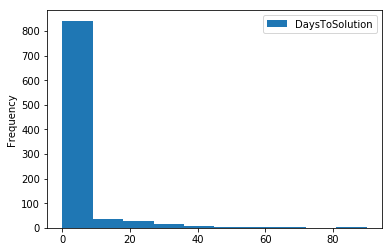

In [38]:
df_caseData.plot.hist()

In [129]:

#df_caseData['DaysToSolution'] = df_caseData['DaysToSolution'].astype(str)

In [ ]:
#Create title (subject+symptoms - in future we can add issue description) and body (resolution) objects. 

In [48]:
df_caseData['Symptomstxt']

0                                  VM reboots very often
1      Out of memory exceptions in the livy logs and ...
2                                     warnings in ambari
3                                        unable to scale
4                                Issue : Scaling failure
5                               Slower query performance
6      120022523001923 - Creation of an HDinsight clu...
7      1: User is unable to deploy a cluster and is g...
8                  Ambari UI throwing 500, server error.
9                     Unable to create Hdinsight cluster
10      Health of cluster - heartbeat lost on all nodes.
11     Cluster stuck in Updating Error state when try...
12                No access to the cluster's headnodes. 
13                         Hive services unable to start
14     We determined that the HDInsight cluster sense...
15     You had an 'Allow_External' rules that applied...
16     Issue:HDI Version:We deployed two new spark hd...
17     FD QA : kpphv806llapfdqa

In [68]:
#create docs. this is nothing but all text is grouped into one field
df_caseData['Titles']=pd.DataFrame(df_caseData.loc[:,'Title']+df_caseData.loc[:,'Symptomstxt']+df_caseData.loc[:,'initCasusePath3'])
df_caseData['Resolution']=pd.DataFrame(df_caseData.loc[:,'Resolutiontxt'])
#df_caseDoc=pd.DataFrame(df_caseData['Doc'])  
#df_caseData.loc[:,'Doc']

In [69]:
df_caseData.columns
#df_caseData.shape
#df_caseData.head(2)

Index(['Title', 'Subject', 'DaysToSolution', 'initCasusePath1',
       'initCasusePath2', 'initCasusePath3', 'Symptomstxt', 'Resolutiontxt',
       'Titles', 'Body', 'Resolution'],
      dtype='object')

## Preprocessing

In [52]:
def convert_lower_case(data):
    return np.char.lower(data)Resolution

In [72]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [122]:
def remove_punctuation(data):
    symbols = "!\\#$%&()*+-./:;<=>?@[]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

In [74]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [75]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [76]:
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [53]:
def preprocess(data):
    data = convert_lower_case(data)
    
    return data


In [123]:
from nltk.tokenize import word_tokenize

processed_title = []
processed_Resolution = []

for column in df_caseData['Titles']:
    processed_title.append(word_tokenize(str(preprocess(str(column)))))
for column in df_caseData['Resolution']:
    processed_Resolution.append(word_tokenize(str(preprocess(str(column)))))
    #print (i)

In [124]:
len(processed_title)
len(processed_Resolution)

945

945

In [97]:
np_titles=np.array(processed_title)
np.unique(np_titles)

array([list(['***advisory', 'case***azure', 'hdinsight', 'cluster', 'connectivity', 'from', 'sas', 'eg', 'server***advisory', 'case***azure', 'hdinsight', 'cluster', 'connectivity', 'from', 'sas', 'eg', 'serverodbc', 'or', 'jdbc', 'connecting', 'to', 'standard', 'cluster']),
       list(['/dev/sda1', 'of', 'hn0', 'has', '81', '%', 'of', 'disk', 'usage/dev/sda1', 'of', 'hn0', 'has', '81', '%', 'of', 'disk', 'usagespark']),
       list(['/hbaserest', 'timesout', 'for', 'stage', 'hdi', 'cluster/hbaserest', 'timesout', 'for', 'stage', 'hdi', 'clusterhbase']),
       list(['/usr/bin/hive', 'org.apache.thrift.transport.ttransportexception', ':', 'http', 'response', 'code', ':', '431few', 'users', 'are', 'not', 'able', 'to', 'connect', 'to', 'beeline.ambari', 'in', 'cluster', 'with', 'enterprise', 'security', 'package']),
       list(['/var/lib/spark2/shs_db', 'keep', 'growing/var/lib/spark2/shs_db', 'keep', 'growingspark']),
       list(['2', '.', "'nonetype", "'", 'object', 'has', 'no', 'at

# Calculating DF for all words¶


In [125]:
N = len (processed_Resolution)

DF = {}

for i in range(N):
    tokens = processed_Resolution[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}

    tokens = processed_title[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}
for i in DF:
    DF[i] = len(DF[i])

In [126]:
total_vocab_size = len(DF)

In [127]:
total_vocab_size

8073

In [128]:
total_vocab = [x for x in DF]

In [129]:
print(total_vocab[:20])


['the', 'vm', 'in', 'question', 'is', 'not', 'hosted', 'on', 'node', 'that', 'was', 'listed', 'during', 'time', 'period', 'of', 'this', 'incident', 'so', 'you']


In [130]:
def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

# Calculating TF-IDF for body, we will consider this as the actual tf-idf as we will add the title weight to this.¶


In [131]:
from collections import Counter

doc = 0

tf_idf = {}

for i in range(N):
    
    tokens = processed_Resolution[i]
    
    counter = Counter(tokens + processed_title[i])
    words_count = len(tokens + processed_title[i])
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = np.log((N+1)/(df+1))
        
        tf_idf[doc, token] = tf*idf

    doc += 1

Calculating TF-IDF for Title¶
# Calculating TF-IDF for Title¶


In [132]:
doc = 0

tf_idf_title = {}

for i in range(N):
    
    tokens = processed_title[i]
    counter = Counter(tokens + processed_Resolution[i])
    words_count = len(tokens + processed_Resolution[i])

    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = np.log((N+1)/(df+1)) #numerator is added 1 to avoid negative values
        
        tf_idf_title[doc, token] = tf*idf

    doc += 1

In [133]:
tf_idf[1,'livy']

0.10174757531634587

In [134]:
tf_idf_title


{(0, ','): 0.01644171398057013,
 (0, 'account'): 0.059286297501231044,
 (0, 'adls'): 0.06202672774388121,
 (0, 'cluster'): 0.015098503111282984,
 (0, 'enterprise'): 0.061542558869560206,
 (0, 'error'): 0.039684879053913276,
 (0, 'for'): 0.022649982010715174,
 (0, 'gen1'): 0.07561784893133112,
 (0, 'gen2'): 0.06464499034436205,
 (0, 'in'): 0.03055678568437151,
 (0, 'kerbaroes'): 0.11281628000752487,
 (0, 'oftenadls'): 0.12076657624493985,
 (0, 'package'): 0.06107005785820608,
 (0, 'reboots'): 0.11281628000752487,
 (0, 'security'): 0.05688233040138139,
 (0, 'service'): 0.03906725813118051,
 (0, 'tgt'): 0.10717545505748996,
 (0, 'the'): 0.02554596441600197,
 (0, 'uservm'): 0.12076657624493985,
 (0, 'very'): 0.07999321268259015,
 (0, 'with'): 0.016489713620543463,
 (1, "'s"): 0.03800120211825088,
 (1, '('): 0.01869574887807232,
 (1, ')'): 0.01846348129999388,
 (1, ','): 0.06368562630448683,
 (1, 'and'): 0.006105589699033559,
 (1, 'application'): 0.03648038804430071,
 (1, 'applicatoin'): 0.

# Merging the TF-IDF according to weights¶


In [136]:
alpha = 0.3
for i in tf_idf:
    tf_idf[i] *= alpha

In [137]:
for i in tf_idf_title:
    tf_idf[i] = tf_idf_title[i]

In [138]:
len(tf_idf)

42484

In [139]:
def matching_score(k, query):
    preprocessed_query = preprocess(query)
    tokens = word_tokenize(str(preprocessed_query))

    print("Matching Score")
    print("\nQuery:", query)
    print("")
    print(tokens)
    
    query_weights = {}

    for key in tf_idf:
        
        if key[1] in tokens:
            try:
                query_weights[key[0]] += tf_idf[key]
            except:
                query_weights[key[0]] = tf_idf[key]
    
    query_weights = sorted(query_weights.items(), key=lambda x: x[1], reverse=True)

    print("")
    
    l = []
    
    for i in query_weights[:10]:
        l.append(i[0])
    
    print(l)

In [175]:
matching_score(12, "not possible to scale up")

Matching Score

Query: not possible to scale up

['not', 'possible', 'to', 'scale', 'up']

[40, 496, 760, 789, 928, 198, 145, 574, 738, 508]


In [174]:
df_caseData.loc[[40, 496, 760, 789, 928, 198, 145, 574, 738, 508],:]

,Title,Subject,DaysToSolution,initCasusePath1,initCasusePath2,initCasusePath3,Symptomstxt,Resolutiontxt,Titles,Body,Resolution
40,scale up failed,scale up failed,0.793977,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,scaling fail,retry,scale up failedscaling failIssue with scaling up,retry,retry
496,auto scale in,auto scale in,4.742842,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Manual scale up failed twice in a row and took...,Asked cx to retry manual scale up and it was s...,auto scale inManual scale up failed twice in a...,Asked cx to retry manual scale up and it was s...,Asked cx to retry manual scale up and it was s...
760,LLAP Cluster: Scale up issues,LLAP Cluster: Scale up issues,20.863643,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,LLAP Cluster: Scale up issues,Will track refund under 120080821000073. Pleas...,LLAP Cluster: Scale up issuesLLAP Cluster: Sca...,Will track refund under 120080821000073. Pleas...,Will track refund under 120080821000073. Pleas...
789,Error rescaling cluster Failed to scale the HD...,Error rescaling cluster Failed to scale the HD...,0.059461,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Symptom: When scaling up this action fails,Resolution: Restarted Ambari and scale was suc...,Error rescaling cluster Failed to scale the HD...,Resolution: Restarted Ambari and scale was suc...,Resolution: Restarted Ambari and scale was suc...
928,Scale up cluster failed and cluster is not in ...,Scale up cluster failed and cluster is not in ...,0.276127,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Scale up cluster failed and cluster is not in ...,System backup and run with scale-up 36 nodes,Scale up cluster failed and cluster is not in ...,System backup and run with scale-up 36 nodes,System backup and run with scale-up 36 nodes
198,HDI 4.0 : Spark :Scale up operation is faili...,HDI 4.0 : Spark :Scale up operation is faili...,3.486474,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,itleHDI 4.0 : Spark :Scale up operation is fai...,deleted the wnodes manually tested scaling dow...,HDI 4.0 : Spark :Scale up operation is faili...,deleted the wnodes manually tested scaling dow...,deleted the wnodes manually tested scaling dow...
145,Yarnui not reachable,Yarnui not reachable,0.355837,Routing Azure HDInsight V5,Service unhealthy,Hadoop,Yarnui not reachable,NaN,Yarnui not reachableYarnui not reachableHadoop,NaN,NaN
574,Attempting to scale the cluster to 256 nodes fail,Attempting to scale the cluster to 256 nodes fail,0.108130,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,scale up failed for nodes greater than 100,use ambari db with s4 tierscale up in interval...,Attempting to scale the cluster to 256 nodes f...,use ambari db with s4 tierscale up in interval...,use ambari db with s4 tierscale up in interval...
738,Unable to scale the cluster,Unable to scale the cluster,18.790506,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Unable to scale the cluster.,We see that cluster scale up failed due to Tim...,Unable to scale the clusterUnable to scale the...,We see that cluster scale up failed due to Tim...,We see that cluster scale up failed due to Tim...
508,"Cluster not Scaling Up, Yarn not Accessible","Cluster not Scaling Up, Yarn not Accessible",0.759414,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Cluster scale up failing for our production jo...,Now able to access the Ambari UI and Yarn UI .,"Cluster not Scaling Up, Yarn not AccessibleClu...",Now able to access the Ambari UI and Yarn UI .,Now able to access the Ambari UI and Yarn UI .


# TF-IDF Cosine Similarity Ranking¶


In [159]:
def cosine_sim(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

# Vectorising tf-idf¶


In [160]:
D = np.zeros((N, total_vocab_size))
for i in tf_idf:
    try:
        ind = total_vocab.index(i[1])
        D[i[0]][ind] = tf_idf[i]
    except:
        pass



In [161]:

import math
def gen_vector(tokens):

    Q = np.zeros((len(total_vocab)))
    
    counter = Counter(tokens)
    words_count = len(tokens)

    query_weights = {}
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = math.log((N+1)/(df+1))

        try:
            ind = total_vocab.index(token)
            Q[ind] = tf*idf
        except:
            pass
    return Q

In [162]:
def cosine_similarity(k, query):
    print("Cosine Similarity")
    preprocessed_query = preprocess(query)
    tokens = word_tokenize(str(preprocessed_query))
    
    print("\nQuery:", query)
    print("")
    print(tokens)
    
    d_cosines = []
    
    query_vector = gen_vector(tokens)
    
    for d in D:
        d_cosines.append(cosine_sim(query_vector, d))
        
    out = np.array(d_cosines).argsort()[-k:][::-1]
    
    print("")
    
    print(out)

#     for i in out:
#         print(i, dataset[i][0])

In [176]:
Q = cosine_similarity(10,"not possible to scale up")

Cosine Similarity

Query: not possible to scale up

['not', 'possible', 'to', 'scale', 'up']

[738 760 496 248 147 789 928  40 421 198]


In [178]:
df_caseData.loc[[738,760, 496, 248, 147, 789, 928,  40, 421, 198],:]

,Title,Subject,DaysToSolution,initCasusePath1,initCasusePath2,initCasusePath3,Symptomstxt,Resolutiontxt,Titles,Body,Resolution
738,Unable to scale the cluster,Unable to scale the cluster,18.790506,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Unable to scale the cluster.,We see that cluster scale up failed due to Tim...,Unable to scale the clusterUnable to scale the...,We see that cluster scale up failed due to Tim...,We see that cluster scale up failed due to Tim...
760,LLAP Cluster: Scale up issues,LLAP Cluster: Scale up issues,20.863643,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,LLAP Cluster: Scale up issues,Will track refund under 120080821000073. Pleas...,LLAP Cluster: Scale up issuesLLAP Cluster: Sca...,Will track refund under 120080821000073. Pleas...,Will track refund under 120080821000073. Pleas...
496,auto scale in,auto scale in,4.742842,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Manual scale up failed twice in a row and took...,Asked cx to retry manual scale up and it was s...,auto scale inManual scale up failed twice in a...,Asked cx to retry manual scale up and it was s...,Asked cx to retry manual scale up and it was s...
248,Cluster not sclae up due to RM,Cluster not sclae up due to RM,0.011344,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Cluster not scale up due to RM,We introduced the ‘node label’ features in the...,Cluster not sclae up due to RMCluster not scal...,We introduced the ‘node label’ features in the...,We introduced the ‘node label’ features in the...
147,HBase cluster getting restarted during region ...,HBase cluster getting restarted during region ...,16.920502,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Complete HBase cluster gets restarted during s...,Microsoft delivered the fix for scale up activ...,HBase cluster getting restarted during region ...,Microsoft delivered the fix for scale up activ...,Microsoft delivered the fix for scale up activ...
789,Error rescaling cluster Failed to scale the HD...,Error rescaling cluster Failed to scale the HD...,0.059461,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Symptom: When scaling up this action fails,Resolution: Restarted Ambari and scale was suc...,Error rescaling cluster Failed to scale the HD...,Resolution: Restarted Ambari and scale was suc...,Resolution: Restarted Ambari and scale was suc...
928,Scale up cluster failed and cluster is not in ...,Scale up cluster failed and cluster is not in ...,0.276127,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,Scale up cluster failed and cluster is not in ...,System backup and run with scale-up 36 nodes,Scale up cluster failed and cluster is not in ...,System backup and run with scale-up 36 nodes,System backup and run with scale-up 36 nodes
40,scale up failed,scale up failed,0.793977,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,scaling fail,retry,scale up failedscaling failIssue with scaling up,retry,retry
421,Are there any recommended configuration tuning...,Are there any recommended configuration tuning...,0.444091,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with Autoscaling,Are there any recommended configuration tuning...,we have checked your latest scaling event that...,Are there any recommended configuration tuning...,we have checked your latest scaling event that...,we have checked your latest scaling event that...
198,HDI 4.0 : Spark :Scale up operation is faili...,HDI 4.0 : Spark :Scale up operation is faili...,3.486474,Routing Azure HDInsight V5,Scale HDInsight cluster,Issue with scaling up,itleHDI 4.0 : Spark :Scale up operation is fai...,deleted the wnodes manually tested scaling dow...,HDI 4.0 : Spark :Scale up operation is faili...,deleted the wnodes manually tested scaling dow...,deleted the wnodes manually tested scaling dow...
